In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import stdev
from statistics import variance

In [2]:
data = pd.read_csv("binclass.txt", header=None) # reading data from binclass.txt
data.rename(columns = {0:'x1',1:'x2',2:'label'}, inplace = True)
data

,x1,x2,label
0,4.5316,13.5610,1
1,8.1112,13.9300,1
2,15.5630,4.8348,1
3,14.7630,20.5850,1
4,14.3260,25.6140,1
...,...,...,...
395,21.6340,6.6954,-1
396,17.6630,12.9390,-1
397,16.5660,1.6164,-1
398,13.9300,9.1910,-1


In [3]:
pos_points= data.loc[data['label']==1]
neg_points= data.loc[data['label']==-1]

In [4]:
#computing mean for positive class
mean_pos_X1 = np.mean(pos_points['x1']) # mean of x1 feature of points in positive class 
mean_pos_X2 = np.mean(pos_points['x2']) # mean of x2 feature of points in positive class 
mean_pos = np.array([mean_pos_X1, mean_pos_X2])

#computing mean for negative class
mean_neg_X1 = np.mean(neg_points['x1']) # mean of x1 feature of points in negative class 
mean_neg_X2 = np.mean(neg_points['x2']) # mean of x2 feature of points in negative class 
mean_neg = np.array([mean_neg_X1, mean_neg_X2])

## Generative Classification with Gaussian Class-Conditionals and different covariances

In [5]:
#computing variances for postive and negative classes
# for positive class
pos_X1_var= np.var(pos_points['x1'])
pos_X2_var= np.var(pos_points['x2'])
pos_var=(pos_X1_var+pos_X2_var)

# for negative class
neg_X1_var= np.var(neg_points['x1'])
neg_X2_var= np.var(neg_points['x2'])
neg_var=(neg_X1_var+neg_X2_var)

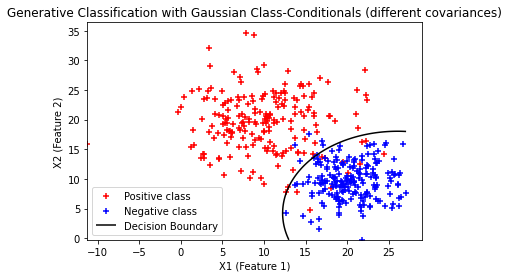

In [6]:
# plot decision boundary
from numpy import arange
from numpy import meshgrid
from matplotlib.colors import ListedColormap
# Create a grid of points
xrange = arange(min(data['x1']), max(data['x1']), 0.01) # min and max values for feature 1
yrange = arange(min(data['x2']), max(data['x2']), 0.01) # min and max values for feature 2
X, Y = meshgrid(xrange,yrange)

# Plotting the Data Points: Positive class with Red color & negative class with Blue color
plt.scatter(pos_points['x1'], pos_points['x2'], color = 'red', label = 'Positive class' , marker='+')
plt.scatter(neg_points['x1'], neg_points['x2'], color = 'blue', label = 'Negative class', marker="+")

# Plotting the Decision Boundary 
Z1 = (((2*3.14)**mean_pos.shape[0])*pos_var)**(-1/2)*np.exp(((X-mean_pos[0])**2 + (Y-mean_pos[1])**2)/(-1*pos_var))
Z2 = (((2*3.14)**mean_neg.shape[0])*neg_var)**(-1/2)*np.exp(((X-mean_neg[0])**2 + (Y-mean_neg[1])**2)/(-1*neg_var))

db = plt.contour(X, Y, (Z1 - Z2), levels = [0], alpha = 1.0, cmap = ListedColormap('black'))
db.collections[0].set_label('Decision Boundary')

# Label Plot
plt.title('Generative Classification with Gaussian Class-Conditionals (different covariances)')
plt.xlabel('X1 (Feature 1)')
plt.ylabel('X2 (Feature 2)')
plt.legend()
plt.show()

## Generative Classification with Gaussian Class-Conditionals and same covariances

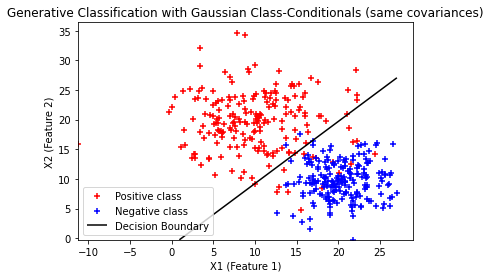

In [7]:
#common variance for both the classes
var = (pos_var + neg_var)
# Create a grid of points
xrange = arange(min(data['x1']), max(data['x1']), 0.01) # min and max values for feature 1
yrange = arange(min(data['x2']), max(data['x2']), 0.01) # min and max values for feature 2
X, Y = meshgrid(xrange,yrange)

# Plotting the Data Points: Positive class with Red color & negative class with Blue color
plt.scatter(pos_points['x1'], pos_points['x2'], color = 'red', label = 'Positive class' , marker='+')
plt.scatter(neg_points['x1'], neg_points['x2'], color = 'blue', label = 'Negative class', marker="+")

# Plotting the Decision Boundary
Z1 = (((2*3.14)**mean_pos.shape[0])*var)**(-1/2)*np.exp(((X-mean_pos[0])**2 + (Y-mean_pos[1])**2)/(-1*var))
Z2 = (((2*3.14)**mean_neg.shape[0])*var)**(-1/2)*np.exp(((X-mean_neg[0])**2 + (Y-mean_neg[1])**2)/(-1*var))

db = plt.contour(X, Y, (Z1 - Z2), levels = [0], alpha = 1.0, cmap = ListedColormap('black'))
db.collections[0].set_label('Decision Boundary')

# Label Plot
plt.title('Generative Classification with Gaussian Class-Conditionals (same covariances)')
plt.xlabel('X1 (Feature 1)')
plt.ylabel('X2 (Feature 2)')
plt.legend()
plt.show()